In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import BatchNormalization
from scipy.interpolate import splrep, splev
import math

In [2]:
train_data = pd.read_csv('ssss32.csv', encoding='cp949')
test_data = pd.read_csv('ssss42.csv', encoding='cp949')

In [3]:
line_num2=[]
line_num2.append(train_data.index[train_data['노선명'] == '7호선'].tolist())
    
train_data = train_data.loc[line_num2[0]]

line_num2=[]
line_num2.append(train_data.index[train_data['역명'] == '공릉'].tolist())

train_data = train_data.loc[line_num2[0]]
train_data = train_data.reset_index(drop=True)
train_data = train_data.reset_index()
train_data['index'] = (train_data['index'] / (len(train_data['index'])-1)) * 4 * np.pi
train_data['index2'] = np.sin(train_data['index'])

In [4]:
example=[0]
for i in range(len(train_data['index2'])-1):
    example.append(train_data['index2'][i+1]-train_data['index2'][i])
train_data['index3'] = example

In [5]:
line_num2=[]
line_num2.append(test_data.index[test_data['노선명'] == '7호선'].tolist())
    
test_data = test_data.loc[line_num2[0]]

line_num2=[]
line_num2.append(test_data.index[test_data['역명'] == '공릉'].tolist())

test_data = test_data.loc[line_num2[0]]
test_data = test_data.reset_index(drop=True)
test_data = test_data.reset_index()
test_data['index'] = (test_data['index'] / (len(test_data['index'])-1)) * 2 * np.pi
test_data['index2'] = np.sin(test_data['index'])

In [6]:
example=[0]
for i in range(len(test_data['index2'])-1):
    example.append(test_data['index2'][i+1]-test_data['index2'][i])
test_data['index3'] = example

In [7]:
train_data = train_data[['사용일자', 'index2', 'index3', '노선명', '역명', '승차총승객수', '하차총승객수', '승차유임승객수', '하차유임승객수', '총생활인구수', '내국인생활인구수', '장기체류외국인인구수', '단기체류외국인인구수', '서울외유입인구수', '엘리베이터', '에스컬레이터', '휠체어리프트', '이동식 안전발판', '전동휠체어급속충전기', '장애인 화장실', '물품보관함', '유아수유실']]
train_data.columns = ['사용일자', '사용일자sin', '사용일자chg', '노선명', '역명', '승차총승객수', '하차총승객수', '승차유임승객수', '하차유임승객수', '총생활인구수', '내국인생활인구수', '장기체류외국인인구수', '단기체류외국인인구수', '서울외유입인구수', '엘리베이터', '에스컬레이터', '휠체어리프트', '이동식 안전발판', '전동휠체어급속충전기', '장애인 화장실', '물품보관함', '유아수유실']
test_data = test_data[['사용일자', 'index2', 'index3', '노선명', '역명', '승차총승객수', '하차총승객수', '승차유임승객수', '하차유임승객수', '총생활인구수', '내국인생활인구수', '장기체류외국인인구수', '단기체류외국인인구수', '서울외유입인구수', '엘리베이터', '에스컬레이터', '휠체어리프트', '이동식 안전발판', '전동휠체어급속충전기', '장애인 화장실', '물품보관함', '유아수유실']]
test_data.columns = ['사용일자', '사용일자sin', '사용일자chg', '노선명', '역명', '승차총승객수', '하차총승객수', '승차유임승객수', '하차유임승객수', '총생활인구수', '내국인생활인구수', '장기체류외국인인구수', '단기체류외국인인구수', '서울외유입인구수', '엘리베이터', '에스컬레이터', '휠체어리프트', '이동식 안전발판', '전동휠체어급속충전기', '장애인 화장실', '물품보관함', '유아수유실']

In [8]:
train_data

,사용일자,사용일자sin,사용일자chg,노선명,역명,승차총승객수,하차총승객수,승차유임승객수,하차유임승객수,총생활인구수,...,단기체류외국인인구수,서울외유입인구수,엘리베이터,에스컬레이터,휠체어리프트,이동식 안전발판,전동휠체어급속충전기,장애인 화장실,물품보관함,유아수유실
0,2018-04-05,0.000000e+00,0.000000,7호선,공릉,0.15408,0.15273,0.128245,0.127121,0.543067,...,0.007780,0.040564,0.3,0.06,0.0,0.1,0.0,0.1,0.1,0.0
1,2018-04-06,1.767330e-02,0.017673,7호선,공릉,0.16582,0.15839,0.138016,0.131832,0.537158,...,0.009787,0.038869,0.3,0.06,0.0,0.1,0.0,0.1,0.1,0.0
2,2018-04-07,3.534108e-02,0.017668,7호선,공릉,0.11753,0.11181,0.097823,0.093062,0.548003,...,0.011989,0.038346,0.3,0.06,0.0,0.1,0.0,0.1,0.1,0.0
3,2018-04-08,5.299782e-02,0.017657,7호선,공릉,0.08434,0.09072,0.070198,0.075509,0.559991,...,0.010704,0.037423,0.3,0.06,0.0,0.1,0.0,0.1,0.1,0.0
4,2018-04-09,7.063800e-02,0.017640,7호선,공릉,0.15557,0.15539,0.129485,0.129335,0.542517,...,0.012016,0.040958,0.3,0.06,0.0,0.1,0.0,0.1,0.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,2020-03-27,-7.063800e-02,0.017618,7호선,공릉,0.10155,0.10178,0.084322,0.084513,0.538002,...,0.017274,0.031945,0.3,0.06,0.0,0.1,0.0,0.1,0.1,0.0
708,2020-03-28,-5.299782e-02,0.017640,7호선,공릉,0.06639,0.06644,0.055127,0.055168,0.556674,...,0.016934,0.031404,0.3,0.06,0.0,0.1,0.0,0.1,0.1,0.0
709,2020-03-29,-3.534108e-02,0.017657,7호선,공릉,0.04866,0.04952,0.040405,0.041119,0.562315,...,0.015423,0.027270,0.3,0.06,0.0,0.1,0.0,0.1,0.1,0.0
710,2020-03-30,-1.767330e-02,0.017668,7호선,공릉,0.09736,0.09911,0.080843,0.082296,0.536810,...,0.014046,0.032586,0.3,0.06,0.0,0.1,0.0,0.1,0.1,0.0


# 모델1

In [9]:
X_train = train_data.drop(['사용일자', '노선명', '역명', '승차유임승객수', '하차유임승객수'], axis=1)
y_train = train_data[['승차유임승객수', '하차유임승객수']]

X_test = test_data.drop(['사용일자', '노선명', '역명', '승차유임승객수', '하차유임승객수'], axis=1)
y_test = test_data[['승차유임승객수', '하차유임승객수']]

In [10]:
X = tf.keras.layers.Input(shape=[17]) #피쳐의 개수 넣어줌
H = tf.keras.layers.Dense(64, activation='swish')(X)
H1 = tf.keras.layers.Dense(32, activation='swish')(H)
H2 = tf.keras.layers.Dense(16, activation='swish')(H1)
H3 = tf.keras.layers.Dense(8, activation='swish')(H2)
y = tf.keras.layers.Dense(2)(H3)
model = tf.keras.models.Model(X,y)
model.compile(loss='mse')

In [11]:
model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
23/23 [==============================] - 1s 591us/step - loss: 0.0025
Epoch 2/1000
23/23 [==============================] - 0s 546us/step - loss: 5.5592e-04
Epoch 3/1000
23/23 [==============================] - 0s 591us/step - loss: 5.2678e-04
Epoch 4/1000
23/23 [==============================] - 0s 591us/step - loss: 4.6299e-04
Epoch 5/1000
23/23 [==============================] - 0s 1ms/step - loss: 3.6905e-04
Epoch 6/1000
23/23 [==============================] - 0s 682us/step - loss: 2.6818e-04
Epoch 7/1000
23/23 [==============================] - 0s 546us/step - loss: 1.7948e-04
Epoch 8/1000
23/23 [==============================] - 0s 546us/step - loss: 1.1503e-04
Epoch 9/1000
23/23 [==============================] - 0s 500us/step - loss: 1.0316e-04
Epoch 10/1000
23/23 [==============================] - 0s 546us/step - loss: 8.9992e-05
Epoch 11/1000
23/23 [==============================] - 0s 500us/step - loss: 6.7319e-05
Epoch 12/1000
23/23 [==========================

23/23 [==============================] - 0s 546us/step - loss: 1.6662e-05
Epoch 187/1000
23/23 [==============================] - 0s 500us/step - loss: 2.1106e-05
Epoch 188/1000
23/23 [==============================] - 0s 546us/step - loss: 1.9879e-05
Epoch 189/1000
23/23 [==============================] - 0s 455us/step - loss: 2.0076e-05
Epoch 190/1000
23/23 [==============================] - 0s 546us/step - loss: 1.9049e-05
Epoch 191/1000
23/23 [==============================] - 0s 546us/step - loss: 2.1269e-05
Epoch 192/1000
23/23 [==============================] - 0s 546us/step - loss: 2.2039e-05
Epoch 193/1000
23/23 [==============================] - 0s 637us/step - loss: 1.7171e-05
Epoch 194/1000
23/23 [==============================] - 0s 546us/step - loss: 2.2061e-05
Epoch 195/1000
23/23 [==============================] - 0s 546us/step - loss: 1.8888e-05
Epoch 196/1000
23/23 [==============================] - 0s 546us/step - loss: 1.9795e-05
Epoch 197/1000
23/23 [==============

23/23 [==============================] - 0s 546us/step - loss: 1.3000e-05
Epoch 371/1000
23/23 [==============================] - 0s 546us/step - loss: 1.2862e-05
Epoch 372/1000
23/23 [==============================] - 0s 500us/step - loss: 1.1356e-05
Epoch 373/1000
23/23 [==============================] - 0s 500us/step - loss: 1.3701e-05
Epoch 374/1000
23/23 [==============================] - 0s 500us/step - loss: 1.3382e-05
Epoch 375/1000
23/23 [==============================] - 0s 546us/step - loss: 1.1484e-05
Epoch 376/1000
23/23 [==============================] - 0s 500us/step - loss: 1.0518e-05
Epoch 377/1000
23/23 [==============================] - 0s 500us/step - loss: 1.5260e-05
Epoch 378/1000
23/23 [==============================] - 0s 516us/step - loss: 1.2588e-05
Epoch 379/1000
23/23 [==============================] - 0s 500us/step - loss: 1.3003e-05
Epoch 380/1000
23/23 [==============================] - 0s 546us/step - loss: 1.2038e-05
Epoch 381/1000
23/23 [==============

23/23 [==============================] - 0s 591us/step - loss: 7.7068e-06
Epoch 555/1000
23/23 [==============================] - 0s 546us/step - loss: 1.0451e-05
Epoch 556/1000
23/23 [==============================] - 0s 546us/step - loss: 8.8328e-06
Epoch 557/1000
23/23 [==============================] - 0s 546us/step - loss: 1.0373e-05
Epoch 558/1000
23/23 [==============================] - 0s 546us/step - loss: 9.8668e-06
Epoch 559/1000
23/23 [==============================] - 0s 500us/step - loss: 9.3734e-06
Epoch 560/1000
23/23 [==============================] - 0s 591us/step - loss: 9.3634e-06
Epoch 561/1000
23/23 [==============================] - 0s 591us/step - loss: 8.9423e-06
Epoch 562/1000
23/23 [==============================] - 0s 591us/step - loss: 1.0291e-05
Epoch 563/1000
23/23 [==============================] - 0s 546us/step - loss: 7.2073e-06
Epoch 564/1000
23/23 [==============================] - 0s 546us/step - loss: 1.1037e-05
Epoch 565/1000
23/23 [==============

23/23 [==============================] - 0s 546us/step - loss: 6.8181e-06
Epoch 738/1000
23/23 [==============================] - 0s 500us/step - loss: 8.8138e-06
Epoch 739/1000
23/23 [==============================] - 0s 546us/step - loss: 7.2596e-06
Epoch 740/1000
23/23 [==============================] - 0s 546us/step - loss: 8.2899e-06
Epoch 741/1000
23/23 [==============================] - 0s 591us/step - loss: 9.1140e-06
Epoch 742/1000
23/23 [==============================] - 0s 546us/step - loss: 6.9083e-06
Epoch 743/1000
23/23 [==============================] - 0s 546us/step - loss: 7.8142e-06
Epoch 744/1000
23/23 [==============================] - 0s 591us/step - loss: 7.6879e-06
Epoch 745/1000
23/23 [==============================] - 0s 546us/step - loss: 8.5799e-06
Epoch 746/1000
23/23 [==============================] - 0s 500us/step - loss: 7.6027e-06
Epoch 747/1000
23/23 [==============================] - 0s 546us/step - loss: 7.7933e-06
Epoch 748/1000
23/23 [==============

23/23 [==============================] - 0s 500us/step - loss: 6.2184e-06
Epoch 922/1000
23/23 [==============================] - 0s 500us/step - loss: 5.9945e-06
Epoch 923/1000
23/23 [==============================] - 0s 546us/step - loss: 6.4735e-06
Epoch 924/1000
23/23 [==============================] - 0s 500us/step - loss: 6.8492e-06
Epoch 925/1000
23/23 [==============================] - 0s 500us/step - loss: 7.0893e-06
Epoch 926/1000
23/23 [==============================] - 0s 546us/step - loss: 6.3609e-06
Epoch 927/1000
23/23 [==============================] - 0s 500us/step - loss: 7.2883e-06
Epoch 928/1000
23/23 [==============================] - 0s 500us/step - loss: 6.9139e-06
Epoch 929/1000
23/23 [==============================] - 0s 500us/step - loss: 6.6911e-06
Epoch 930/1000
23/23 [==============================] - 0s 500us/step - loss: 6.7664e-06
Epoch 931/1000
23/23 [==============================] - 0s 500us/step - loss: 5.7339e-06
Epoch 932/1000
23/23 [==============

In [12]:
pred = model.predict(X_test)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1152      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 18        
Total params: 3,914
Trainable params: 3,914
Non-trainable params: 0
___________________________________________________________

In [13]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, pred) 
np.sqrt(MSE)

0.0023917109257459144

In [62]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

0.0011620940872276706

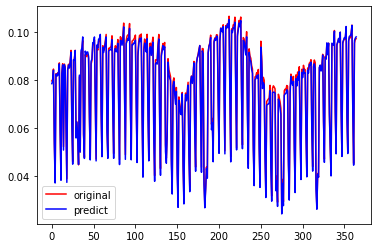

In [69]:
plt.figure() 
plt.plot(np.array(y_test['승차유임승객수']), c='r', label='original') 
plt.plot(pred[:,0], c='b', label='predict') 
plt.legend()
plt.savefig('모델11.png')
plt.show()

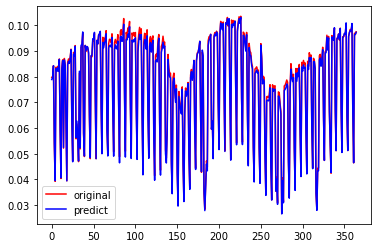

In [70]:
plt.figure() 
plt.plot(np.array(y_test['하차유임승객수']), c='r', label='original') 
plt.plot(pred[:,1], c='b', label='predict') 
plt.legend()
plt.savefig('모델12.png')
plt.show()

# 모델2

In [71]:
X_train = train_data.drop(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '승차유임승객수', '하차유임승객수'], axis=1)
y_train = train_data[['승차유임승객수', '하차유임승객수']]

X_test = test_data.drop(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '승차유임승객수', '하차유임승객수'], axis=1)
y_test = test_data[['승차유임승객수', '하차유임승객수']]

In [72]:
X = tf.keras.layers.Input(shape=[15]) #피쳐의 개수 넣어줌
H = tf.keras.layers.Dense(64, activation='swish')(X)
H1 = tf.keras.layers.Dense(32, activation='swish')(H)
H2 = tf.keras.layers.Dense(16, activation='swish')(H1)
H3 = tf.keras.layers.Dense(8, activation='swish')(H2)
y = tf.keras.layers.Dense(2)(H3)
model = tf.keras.models.Model(X,y)
model.compile(loss='mse')

In [73]:
model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 2/1000
23/23 [==============================] - 0s 500us/step - loss: 7.2746e-04
Epoch 3/1000
23/23 [==============================] - 0s 500us/step - loss: 7.4728e-04
Epoch 4/1000
23/23 [==============================] - 0s 546us/step - loss: 7.3987e-04
Epoch 5/1000
23/23 [==============================] - 0s 500us/step - loss: 7.4199e-04
Epoch 6/1000
23/23 [==============================] - 0s 455us/step - loss: 7.4025e-04
Epoch 7/1000
23/23 [==============================] - 0s 500us/step - loss: 7.1545e-04
Epoch 8/1000
23/23 [==============================] - 0s 500us/step - loss: 7.0555e-04
Epoch 9/1000
23/23 [==============================] - 0s 500us/step - loss: 7.1935e-04
Epoch 10/1000
23/23 [==============================] - 0s 500us/step - loss: 7.2966e-04
Epoch 11/1000
23/23 [==============================] - 0s 455us/step - loss: 6.9080e-04
Epoch 12/1000
23/23 [==========================

23/23 [==============================] - 0s 500us/step - loss: 4.8557e-04
Epoch 187/1000
23/23 [==============================] - 0s 455us/step - loss: 5.0468e-04
Epoch 188/1000
23/23 [==============================] - 0s 500us/step - loss: 4.7162e-04
Epoch 189/1000
23/23 [==============================] - 0s 500us/step - loss: 4.8139e-04
Epoch 190/1000
23/23 [==============================] - 0s 500us/step - loss: 4.6866e-04
Epoch 191/1000
23/23 [==============================] - 0s 500us/step - loss: 5.0807e-04
Epoch 192/1000
23/23 [==============================] - 0s 500us/step - loss: 4.8604e-04
Epoch 193/1000
23/23 [==============================] - 0s 500us/step - loss: 5.2149e-04
Epoch 194/1000
23/23 [==============================] - 0s 500us/step - loss: 4.5934e-04
Epoch 195/1000
23/23 [==============================] - 0s 500us/step - loss: 4.9166e-04
Epoch 196/1000
23/23 [==============================] - 0s 500us/step - loss: 4.9429e-04
Epoch 197/1000
23/23 [==============

23/23 [==============================] - 0s 500us/step - loss: 3.7933e-04
Epoch 371/1000
23/23 [==============================] - 0s 500us/step - loss: 3.8806e-04
Epoch 372/1000
23/23 [==============================] - 0s 455us/step - loss: 3.7882e-04
Epoch 373/1000
23/23 [==============================] - 0s 500us/step - loss: 3.8789e-04
Epoch 374/1000
23/23 [==============================] - 0s 500us/step - loss: 3.7220e-04
Epoch 375/1000
23/23 [==============================] - 0s 546us/step - loss: 3.7725e-04
Epoch 376/1000
23/23 [==============================] - 0s 500us/step - loss: 3.8319e-04
Epoch 377/1000
23/23 [==============================] - 0s 455us/step - loss: 3.6892e-04
Epoch 378/1000
23/23 [==============================] - 0s 500us/step - loss: 3.7364e-04
Epoch 379/1000
23/23 [==============================] - 0s 500us/step - loss: 3.9281e-04
Epoch 380/1000
23/23 [==============================] - 0s 500us/step - loss: 3.9552e-04
Epoch 381/1000
23/23 [==============

23/23 [==============================] - 0s 500us/step - loss: 3.3785e-04
Epoch 555/1000
23/23 [==============================] - 0s 500us/step - loss: 2.9716e-04
Epoch 556/1000
23/23 [==============================] - 0s 500us/step - loss: 3.0765e-04
Epoch 557/1000
23/23 [==============================] - 0s 500us/step - loss: 3.1850e-04
Epoch 558/1000
23/23 [==============================] - 0s 500us/step - loss: 3.1351e-04
Epoch 559/1000
23/23 [==============================] - 0s 500us/step - loss: 3.0167e-04
Epoch 560/1000
23/23 [==============================] - 0s 500us/step - loss: 3.1570e-04
Epoch 561/1000
23/23 [==============================] - 0s 500us/step - loss: 3.1993e-04
Epoch 562/1000
23/23 [==============================] - 0s 500us/step - loss: 3.1410e-04
Epoch 563/1000
23/23 [==============================] - 0s 455us/step - loss: 3.2716e-04
Epoch 564/1000
23/23 [==============================] - 0s 546us/step - loss: 2.9456e-04
Epoch 565/1000
23/23 [==============

23/23 [==============================] - 0s 500us/step - loss: 3.0748e-04
Epoch 739/1000
23/23 [==============================] - 0s 500us/step - loss: 3.0284e-04
Epoch 740/1000
23/23 [==============================] - 0s 455us/step - loss: 3.0117e-04
Epoch 741/1000
23/23 [==============================] - 0s 500us/step - loss: 2.7873e-04
Epoch 742/1000
23/23 [==============================] - 0s 500us/step - loss: 2.9235e-04
Epoch 743/1000
23/23 [==============================] - 0s 500us/step - loss: 3.0849e-04
Epoch 744/1000
23/23 [==============================] - 0s 500us/step - loss: 2.9415e-04
Epoch 745/1000
23/23 [==============================] - 0s 455us/step - loss: 3.0207e-04
Epoch 746/1000
23/23 [==============================] - 0s 500us/step - loss: 2.8636e-04
Epoch 747/1000
23/23 [==============================] - 0s 500us/step - loss: 2.9231e-04
Epoch 748/1000
23/23 [==============================] - 0s 500us/step - loss: 2.8852e-04
Epoch 749/1000
23/23 [==============

23/23 [==============================] - 0s 455us/step - loss: 2.8531e-04
Epoch 923/1000
23/23 [==============================] - 0s 500us/step - loss: 2.8342e-04
Epoch 924/1000
23/23 [==============================] - 0s 500us/step - loss: 2.6848e-04
Epoch 925/1000
23/23 [==============================] - 0s 455us/step - loss: 2.6389e-04
Epoch 926/1000
23/23 [==============================] - 0s 500us/step - loss: 2.6776e-04
Epoch 927/1000
23/23 [==============================] - 0s 500us/step - loss: 2.7565e-04
Epoch 928/1000
23/23 [==============================] - 0s 500us/step - loss: 2.6994e-04
Epoch 929/1000
23/23 [==============================] - 0s 455us/step - loss: 2.7164e-04
Epoch 930/1000
23/23 [==============================] - 0s 500us/step - loss: 2.6979e-04
Epoch 931/1000
23/23 [==============================] - 0s 500us/step - loss: 2.8374e-04
Epoch 932/1000
23/23 [==============================] - 0s 500us/step - loss: 2.8474e-04
Epoch 933/1000
23/23 [==============

In [74]:
pred = model.predict(X_test)

In [75]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, pred) 
np.sqrt(MSE)

0.030108909938611594

In [76]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

0.027476777465295532

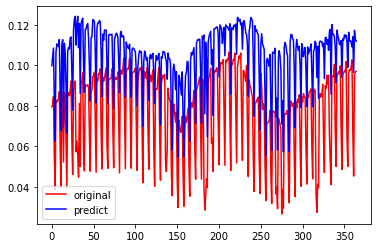

In [77]:
plt.figure() 
plt.plot(np.array(y_test['승차유임승객수']), c='r', label='original') 
plt.plot(pred[:,0], c='b', label='predict') 
plt.legend()
plt.savefig('모델21.png')
plt.show()

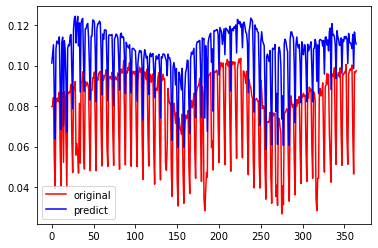

In [78]:
plt.figure() 
plt.plot(np.array(y_test['하차유임승객수']), c='r', label='original') 
plt.plot(pred[:,1], c='b', label='predict') 
plt.legend()
plt.savefig('모델22.png')
plt.show()

# 모델3

In [79]:
X_train = train_data.drop(['사용일자', '노선명', '역명', '승차유임승객수', '하차유임승객수', '총생활인구수', '내국인생활인구수', '장기체류외국인인구수', '단기체류외국인인구수', '서울외유입인구수'], axis=1)
y_train = train_data[['승차유임승객수', '하차유임승객수']]

X_test = test_data.drop(['사용일자', '노선명', '역명', '승차유임승객수', '하차유임승객수', '총생활인구수', '내국인생활인구수', '장기체류외국인인구수', '단기체류외국인인구수', '서울외유입인구수'], axis=1)
y_test = test_data[['승차유임승객수', '하차유임승객수']]

In [80]:
X = tf.keras.layers.Input(shape=[12]) #피쳐의 개수 넣어줌
H = tf.keras.layers.Dense(64, activation='swish')(X)
H1 = tf.keras.layers.Dense(32, activation='swish')(H)
H2 = tf.keras.layers.Dense(16, activation='swish')(H1)
H3 = tf.keras.layers.Dense(8, activation='swish')(H2)
y = tf.keras.layers.Dense(2)(H3)
model = tf.keras.models.Model(X,y)
model.compile(loss='mse')

In [81]:
model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
23/23 [==============================] - 0s 614us/step - loss: 0.0022
Epoch 2/1000
23/23 [==============================] - 0s 500us/step - loss: 6.1789e-04
Epoch 3/1000
23/23 [==============================] - 0s 500us/step - loss: 5.2569e-04
Epoch 4/1000
23/23 [==============================] - 0s 500us/step - loss: 4.2124e-04
Epoch 5/1000
23/23 [==============================] - 0s 546us/step - loss: 2.9000e-04
Epoch 6/1000
23/23 [==============================] - 0s 500us/step - loss: 2.2511e-04
Epoch 7/1000
23/23 [==============================] - 0s 500us/step - loss: 1.4075e-04
Epoch 8/1000
23/23 [==============================] - 0s 500us/step - loss: 1.2533e-04
Epoch 9/1000
23/23 [==============================] - 0s 500us/step - loss: 8.9580e-05
Epoch 10/1000
23/23 [==============================] - 0s 500us/step - loss: 8.8258e-05
Epoch 11/1000
23/23 [==============================] - 0s 500us/step - loss: 7.8572e-05
Epoch 12/1000
23/23 [========================

23/23 [==============================] - 0s 546us/step - loss: 1.8325e-05
Epoch 187/1000
23/23 [==============================] - 0s 500us/step - loss: 1.9917e-05
Epoch 188/1000
23/23 [==============================] - 0s 500us/step - loss: 1.7051e-05
Epoch 189/1000
23/23 [==============================] - 0s 500us/step - loss: 1.9590e-05
Epoch 190/1000
23/23 [==============================] - 0s 500us/step - loss: 1.6192e-05
Epoch 191/1000
23/23 [==============================] - 0s 500us/step - loss: 1.8121e-05
Epoch 192/1000
23/23 [==============================] - 0s 455us/step - loss: 1.8806e-05
Epoch 193/1000
23/23 [==============================] - 0s 500us/step - loss: 1.6036e-05
Epoch 194/1000
23/23 [==============================] - 0s 500us/step - loss: 1.8919e-05
Epoch 195/1000
23/23 [==============================] - 0s 500us/step - loss: 1.6854e-05
Epoch 196/1000
23/23 [==============================] - 0s 500us/step - loss: 1.7081e-05
Epoch 197/1000
23/23 [==============

23/23 [==============================] - 0s 500us/step - loss: 8.6471e-06
Epoch 371/1000
23/23 [==============================] - 0s 455us/step - loss: 1.2002e-05
Epoch 372/1000
23/23 [==============================] - 0s 500us/step - loss: 1.0488e-05
Epoch 373/1000
23/23 [==============================] - 0s 591us/step - loss: 9.7912e-06
Epoch 374/1000
23/23 [==============================] - 0s 546us/step - loss: 1.1450e-05
Epoch 375/1000
23/23 [==============================] - 0s 546us/step - loss: 8.5422e-06
Epoch 376/1000
23/23 [==============================] - 0s 546us/step - loss: 1.2390e-05
Epoch 377/1000
23/23 [==============================] - 0s 500us/step - loss: 9.3817e-06
Epoch 378/1000
23/23 [==============================] - 0s 546us/step - loss: 1.1091e-05
Epoch 379/1000
23/23 [==============================] - 0s 500us/step - loss: 9.1254e-06
Epoch 380/1000
23/23 [==============================] - 0s 500us/step - loss: 1.0846e-05
Epoch 381/1000
23/23 [==============

23/23 [==============================] - 0s 500us/step - loss: 7.4159e-06
Epoch 555/1000
23/23 [==============================] - 0s 500us/step - loss: 7.8560e-06
Epoch 556/1000
23/23 [==============================] - 0s 546us/step - loss: 8.4761e-06
Epoch 557/1000
23/23 [==============================] - 0s 455us/step - loss: 9.3650e-06
Epoch 558/1000
23/23 [==============================] - 0s 500us/step - loss: 7.1827e-06
Epoch 559/1000
23/23 [==============================] - 0s 500us/step - loss: 8.1043e-06
Epoch 560/1000
23/23 [==============================] - 0s 455us/step - loss: 7.7654e-06
Epoch 561/1000
23/23 [==============================] - 0s 546us/step - loss: 8.0924e-06
Epoch 562/1000
23/23 [==============================] - 0s 500us/step - loss: 7.8969e-06
Epoch 563/1000
23/23 [==============================] - 0s 517us/step - loss: 7.9051e-06
Epoch 564/1000
23/23 [==============================] - 0s 500us/step - loss: 7.4913e-06
Epoch 565/1000
23/23 [==============

23/23 [==============================] - 0s 546us/step - loss: 6.6689e-06
Epoch 739/1000
23/23 [==============================] - 0s 500us/step - loss: 7.3398e-06
Epoch 740/1000
23/23 [==============================] - 0s 500us/step - loss: 5.5670e-06
Epoch 741/1000
23/23 [==============================] - 0s 500us/step - loss: 6.3476e-06
Epoch 742/1000
23/23 [==============================] - 0s 500us/step - loss: 8.0339e-06
Epoch 743/1000
23/23 [==============================] - 0s 455us/step - loss: 7.0389e-06
Epoch 744/1000
23/23 [==============================] - 0s 500us/step - loss: 5.9077e-06
Epoch 745/1000
23/23 [==============================] - 0s 506us/step - loss: 6.9672e-06
Epoch 746/1000
23/23 [==============================] - 0s 546us/step - loss: 6.4965e-06
Epoch 747/1000
23/23 [==============================] - 0s 500us/step - loss: 6.3246e-06
Epoch 748/1000
23/23 [==============================] - 0s 455us/step - loss: 6.8230e-06
Epoch 749/1000
23/23 [==============

23/23 [==============================] - 0s 500us/step - loss: 5.9043e-06
Epoch 923/1000
23/23 [==============================] - 0s 500us/step - loss: 6.1639e-06
Epoch 924/1000
23/23 [==============================] - 0s 546us/step - loss: 5.5893e-06
Epoch 925/1000
23/23 [==============================] - 0s 500us/step - loss: 5.0681e-06
Epoch 926/1000
23/23 [==============================] - 0s 500us/step - loss: 6.9454e-06
Epoch 927/1000
23/23 [==============================] - 0s 455us/step - loss: 5.6026e-06
Epoch 928/1000
23/23 [==============================] - 0s 500us/step - loss: 5.5365e-06
Epoch 929/1000
23/23 [==============================] - 0s 500us/step - loss: 6.2686e-06
Epoch 930/1000
23/23 [==============================] - 0s 500us/step - loss: 5.1165e-06
Epoch 931/1000
23/23 [==============================] - 0s 455us/step - loss: 5.9678e-06
Epoch 932/1000
23/23 [==============================] - 0s 500us/step - loss: 6.1086e-06
Epoch 933/1000
23/23 [==============

In [82]:
pred = model.predict(X_test)

In [83]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, pred) 
np.sqrt(MSE)

0.003898539197352167

In [84]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

0.003382431973252633

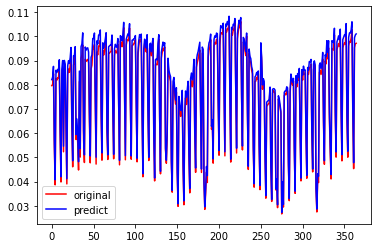

In [85]:
plt.figure() 
plt.plot(np.array(y_test['승차유임승객수']), c='r', label='original') 
plt.plot(pred[:,0], c='b', label='predict') 
plt.legend()
plt.savefig('모델31.png')
plt.show()

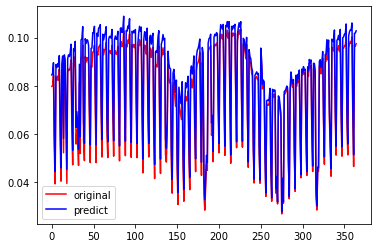

In [86]:
plt.figure() 
plt.plot(np.array(y_test['하차유임승객수']), c='r', label='original') 
plt.plot(pred[:,1], c='b', label='predict') 
plt.legend()
plt.savefig('모델32.png')
plt.show()

# 모델4

In [95]:
X_train = train_data.drop(['사용일자', '노선명', '역명', '승차유임승객수', '하차유임승객수', '엘리베이터', '에스컬레이터', '휠체어리프트', '이동식 안전발판', '전동휠체어급속충전기', '장애인 화장실', '물품보관함', '유아수유실'], axis=1)
y_train = train_data[['승차유임승객수', '하차유임승객수']]

X_test = test_data.drop(['사용일자', '노선명', '역명', '승차유임승객수', '하차유임승객수', '엘리베이터', '에스컬레이터', '휠체어리프트', '이동식 안전발판', '전동휠체어급속충전기', '장애인 화장실', '물품보관함', '유아수유실'], axis=1)
y_test = test_data[['승차유임승객수', '하차유임승객수']]

In [96]:
X = tf.keras.layers.Input(shape=[9]) #피쳐의 개수 넣어줌
H = tf.keras.layers.Dense(64, activation='swish')(X)
H1 = tf.keras.layers.Dense(32, activation='swish')(H)
H2 = tf.keras.layers.Dense(16, activation='swish')(H1)
H3 = tf.keras.layers.Dense(8, activation='swish')(H2)
y = tf.keras.layers.Dense(2)(H3)
model = tf.keras.models.Model(X,y)
model.compile(loss='mse')

In [97]:
model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
23/23 [==============================] - 0s 783us/step - loss: 0.0011
Epoch 2/1000
23/23 [==============================] - 0s 546us/step - loss: 5.4545e-04
Epoch 3/1000
23/23 [==============================] - 0s 500us/step - loss: 4.6646e-04
Epoch 4/1000
23/23 [==============================] - 0s 500us/step - loss: 3.8083e-04
Epoch 5/1000
23/23 [==============================] - 0s 500us/step - loss: 3.0551e-04
Epoch 6/1000
23/23 [==============================] - 0s 500us/step - loss: 2.4643e-04
Epoch 7/1000
23/23 [==============================] - 0s 500us/step - loss: 1.7242e-04
Epoch 8/1000
23/23 [==============================] - 0s 500us/step - loss: 1.2421e-04
Epoch 9/1000
23/23 [==============================] - 0s 500us/step - loss: 1.2465e-04
Epoch 10/1000
23/23 [==============================] - 0s 546us/step - loss: 1.0113e-04
Epoch 11/1000
23/23 [==============================] - 0s 500us/step - loss: 7.2861e-05
Epoch 12/1000
23/23 [========================

23/23 [==============================] - 0s 500us/step - loss: 1.9838e-05
Epoch 187/1000
23/23 [==============================] - 0s 496us/step - loss: 2.1882e-05
Epoch 188/1000
23/23 [==============================] - 0s 500us/step - loss: 1.7239e-05
Epoch 189/1000
23/23 [==============================] - 0s 500us/step - loss: 2.3191e-05
Epoch 190/1000
23/23 [==============================] - 0s 455us/step - loss: 2.0691e-05
Epoch 191/1000
23/23 [==============================] - 0s 500us/step - loss: 1.9456e-05
Epoch 192/1000
23/23 [==============================] - 0s 455us/step - loss: 2.0673e-05
Epoch 193/1000
23/23 [==============================] - 0s 500us/step - loss: 1.9455e-05
Epoch 194/1000
23/23 [==============================] - 0s 500us/step - loss: 2.0396e-05
Epoch 195/1000
23/23 [==============================] - 0s 500us/step - loss: 1.9850e-05
Epoch 196/1000
23/23 [==============================] - 0s 500us/step - loss: 2.1773e-05
Epoch 197/1000
23/23 [==============

23/23 [==============================] - 0s 500us/step - loss: 1.1405e-05
Epoch 371/1000
23/23 [==============================] - 0s 546us/step - loss: 1.0717e-05
Epoch 372/1000
23/23 [==============================] - 0s 500us/step - loss: 1.4219e-05
Epoch 373/1000
23/23 [==============================] - 0s 546us/step - loss: 1.0619e-05
Epoch 374/1000
23/23 [==============================] - 0s 546us/step - loss: 1.1817e-05
Epoch 375/1000
23/23 [==============================] - 0s 500us/step - loss: 1.3241e-05
Epoch 376/1000
23/23 [==============================] - 0s 546us/step - loss: 1.3032e-05
Epoch 377/1000
23/23 [==============================] - 0s 500us/step - loss: 1.3253e-05
Epoch 378/1000
23/23 [==============================] - 0s 500us/step - loss: 1.1796e-05
Epoch 379/1000
23/23 [==============================] - 0s 546us/step - loss: 1.1581e-05
Epoch 380/1000
23/23 [==============================] - 0s 546us/step - loss: 1.2631e-05
Epoch 381/1000
23/23 [==============

23/23 [==============================] - 0s 500us/step - loss: 7.4732e-06
Epoch 555/1000
23/23 [==============================] - 0s 546us/step - loss: 1.0439e-05
Epoch 556/1000
23/23 [==============================] - 0s 500us/step - loss: 8.8414e-06
Epoch 557/1000
23/23 [==============================] - 0s 546us/step - loss: 1.0523e-05
Epoch 558/1000
23/23 [==============================] - 0s 546us/step - loss: 8.2181e-06
Epoch 559/1000
23/23 [==============================] - 0s 455us/step - loss: 8.3118e-06
Epoch 560/1000
23/23 [==============================] - 0s 546us/step - loss: 8.8649e-06
Epoch 561/1000
23/23 [==============================] - 0s 500us/step - loss: 7.2918e-06
Epoch 562/1000
23/23 [==============================] - 0s 455us/step - loss: 1.0849e-05
Epoch 563/1000
23/23 [==============================] - 0s 499us/step - loss: 9.1629e-06
Epoch 564/1000
23/23 [==============================] - 0s 546us/step - loss: 8.0787e-06
Epoch 565/1000
23/23 [==============

23/23 [==============================] - 0s 500us/step - loss: 6.3297e-06
Epoch 739/1000
23/23 [==============================] - 0s 500us/step - loss: 8.4108e-06
Epoch 740/1000
23/23 [==============================] - 0s 500us/step - loss: 8.3994e-06
Epoch 741/1000
23/23 [==============================] - 0s 500us/step - loss: 6.1079e-06
Epoch 742/1000
23/23 [==============================] - 0s 500us/step - loss: 7.7656e-06
Epoch 743/1000
23/23 [==============================] - 0s 500us/step - loss: 7.6244e-06
Epoch 744/1000
23/23 [==============================] - 0s 591us/step - loss: 7.3330e-06
Epoch 745/1000
23/23 [==============================] - 0s 591us/step - loss: 6.9007e-06
Epoch 746/1000
23/23 [==============================] - 0s 546us/step - loss: 7.6461e-06
Epoch 747/1000
23/23 [==============================] - 0s 546us/step - loss: 6.9400e-06
Epoch 748/1000
23/23 [==============================] - 0s 546us/step - loss: 6.3873e-06
Epoch 749/1000
23/23 [==============

23/23 [==============================] - 0s 500us/step - loss: 6.9312e-06
Epoch 923/1000
23/23 [==============================] - 0s 500us/step - loss: 5.7384e-06
Epoch 924/1000
23/23 [==============================] - 0s 546us/step - loss: 5.6535e-06
Epoch 925/1000
23/23 [==============================] - 0s 500us/step - loss: 6.3828e-06
Epoch 926/1000
23/23 [==============================] - 0s 455us/step - loss: 6.3852e-06
Epoch 927/1000
23/23 [==============================] - 0s 500us/step - loss: 7.0581e-06
Epoch 928/1000
23/23 [==============================] - 0s 500us/step - loss: 5.2029e-06
Epoch 929/1000
23/23 [==============================] - 0s 500us/step - loss: 6.9082e-06
Epoch 930/1000
23/23 [==============================] - 0s 455us/step - loss: 7.0966e-06
Epoch 931/1000
23/23 [==============================] - 0s 500us/step - loss: 5.4880e-06
Epoch 932/1000
23/23 [==============================] - 0s 546us/step - loss: 5.5695e-06
Epoch 933/1000
23/23 [==============

In [98]:
pred = model.predict(X_test)

In [99]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, pred) 
np.sqrt(MSE)

0.0015974589571854235

In [100]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

0.001235109154831253

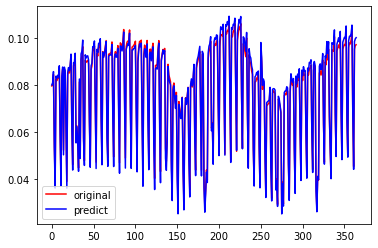

In [101]:
plt.figure() 
plt.plot(np.array(y_test['승차유임승객수']), c='r', label='original') 
plt.plot(pred[:,0], c='b', label='predict') 
plt.legend()
plt.savefig('모델41.png')
plt.show()

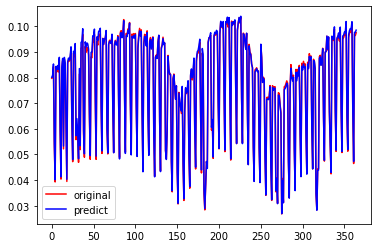

In [102]:
plt.figure() 
plt.plot(np.array(y_test['하차유임승객수']), c='r', label='original') 
plt.plot(pred[:,1], c='b', label='predict') 
plt.legend()
plt.savefig('모델42.png')
plt.show()

# 모델5

In [103]:
X_train = train_data.drop(['사용일자', '노선명', '역명', '승차유임승객수', '하차유임승객수', '총생활인구수', '내국인생활인구수', '장기체류외국인인구수', '단기체류외국인인구수', '서울외유입인구수', '엘리베이터', '에스컬레이터', '휠체어리프트', '이동식 안전발판', '전동휠체어급속충전기', '장애인 화장실', '물품보관함', '유아수유실'], axis=1)
y_train = train_data[['승차유임승객수', '하차유임승객수']]

X_test = test_data.drop(['사용일자', '노선명', '역명', '승차유임승객수', '하차유임승객수', '총생활인구수', '내국인생활인구수', '장기체류외국인인구수', '단기체류외국인인구수', '서울외유입인구수', '엘리베이터', '에스컬레이터', '휠체어리프트', '이동식 안전발판', '전동휠체어급속충전기', '장애인 화장실', '물품보관함', '유아수유실'], axis=1)
y_test = test_data[['승차유임승객수', '하차유임승객수']]

In [104]:
X = tf.keras.layers.Input(shape=[4]) #피쳐의 개수 넣어줌
H = tf.keras.layers.Dense(64, activation='swish')(X)
H1 = tf.keras.layers.Dense(32, activation='swish')(H)
H2 = tf.keras.layers.Dense(16, activation='swish')(H1)
H3 = tf.keras.layers.Dense(8, activation='swish')(H2)
y = tf.keras.layers.Dense(2)(H3)
model = tf.keras.models.Model(X,y)
model.compile(loss='mse')

In [105]:
model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
23/23 [==============================] - 1s 595us/step - loss: 0.0023
Epoch 2/1000
23/23 [==============================] - 0s 546us/step - loss: 5.0616e-04
Epoch 3/1000
23/23 [==============================] - 0s 546us/step - loss: 4.0512e-04
Epoch 4/1000
23/23 [==============================] - 0s 546us/step - loss: 3.0168e-04
Epoch 5/1000
23/23 [==============================] - 0s 500us/step - loss: 2.0428e-04
Epoch 6/1000
23/23 [==============================] - 0s 546us/step - loss: 1.4109e-04
Epoch 7/1000
23/23 [==============================] - 0s 546us/step - loss: 9.0568e-05
Epoch 8/1000
23/23 [==============================] - 0s 500us/step - loss: 7.9204e-05
Epoch 9/1000
23/23 [==============================] - 0s 500us/step - loss: 5.6800e-05
Epoch 10/1000
23/23 [==============================] - 0s 500us/step - loss: 5.9774e-05
Epoch 11/1000
23/23 [==============================] - 0s 500us/step - loss: 7.2002e-05
Epoch 12/1000
23/23 [========================

23/23 [==============================] - 0s 546us/step - loss: 1.7907e-05
Epoch 187/1000
23/23 [==============================] - 0s 500us/step - loss: 1.4736e-05
Epoch 188/1000
23/23 [==============================] - 0s 500us/step - loss: 1.8370e-05
Epoch 189/1000
23/23 [==============================] - 0s 500us/step - loss: 1.3891e-05
Epoch 190/1000
23/23 [==============================] - 0s 546us/step - loss: 1.6030e-05
Epoch 191/1000
23/23 [==============================] - 0s 546us/step - loss: 1.7811e-05
Epoch 192/1000
23/23 [==============================] - 0s 500us/step - loss: 1.4109e-05
Epoch 193/1000
23/23 [==============================] - 0s 500us/step - loss: 1.8866e-05
Epoch 194/1000
23/23 [==============================] - 0s 500us/step - loss: 1.3163e-05
Epoch 195/1000
23/23 [==============================] - 0s 500us/step - loss: 1.6443e-05
Epoch 196/1000
23/23 [==============================] - 0s 500us/step - loss: 1.9042e-05
Epoch 197/1000
23/23 [==============

23/23 [==============================] - 0s 500us/step - loss: 1.1499e-05
Epoch 371/1000
23/23 [==============================] - 0s 500us/step - loss: 8.1183e-06
Epoch 372/1000
23/23 [==============================] - 0s 500us/step - loss: 9.3750e-06
Epoch 373/1000
23/23 [==============================] - 0s 500us/step - loss: 9.6777e-06
Epoch 374/1000
23/23 [==============================] - 0s 500us/step - loss: 1.0017e-05
Epoch 375/1000
23/23 [==============================] - 0s 500us/step - loss: 1.0232e-05
Epoch 376/1000
23/23 [==============================] - 0s 500us/step - loss: 8.0354e-06
Epoch 377/1000
23/23 [==============================] - 0s 500us/step - loss: 8.5168e-06
Epoch 378/1000
23/23 [==============================] - 0s 500us/step - loss: 1.1235e-05
Epoch 379/1000
23/23 [==============================] - 0s 500us/step - loss: 9.9741e-06
Epoch 380/1000
23/23 [==============================] - 0s 546us/step - loss: 7.7963e-06
Epoch 381/1000
23/23 [==============

23/23 [==============================] - 0s 591us/step - loss: 5.0348e-06
Epoch 554/1000
23/23 [==============================] - 0s 500us/step - loss: 7.4746e-06
Epoch 555/1000
23/23 [==============================] - 0s 455us/step - loss: 6.6049e-06
Epoch 556/1000
23/23 [==============================] - 0s 500us/step - loss: 7.1731e-06
Epoch 557/1000
23/23 [==============================] - 0s 500us/step - loss: 6.3410e-06
Epoch 558/1000
23/23 [==============================] - 0s 500us/step - loss: 5.5492e-06
Epoch 559/1000
23/23 [==============================] - 0s 500us/step - loss: 8.3850e-06
Epoch 560/1000
23/23 [==============================] - 0s 500us/step - loss: 5.8956e-06
Epoch 561/1000
23/23 [==============================] - 0s 500us/step - loss: 7.3015e-06
Epoch 562/1000
23/23 [==============================] - 0s 500us/step - loss: 6.5255e-06
Epoch 563/1000
23/23 [==============================] - 0s 455us/step - loss: 6.0825e-06
Epoch 564/1000
23/23 [==============

23/23 [==============================] - 0s 546us/step - loss: 4.8678e-06
Epoch 738/1000
23/23 [==============================] - 0s 500us/step - loss: 5.8665e-06
Epoch 739/1000
23/23 [==============================] - 0s 500us/step - loss: 5.6850e-06
Epoch 740/1000
23/23 [==============================] - 0s 546us/step - loss: 4.1072e-06
Epoch 741/1000
23/23 [==============================] - 0s 500us/step - loss: 5.5712e-06
Epoch 742/1000
23/23 [==============================] - 0s 500us/step - loss: 6.3760e-06
Epoch 743/1000
23/23 [==============================] - 0s 500us/step - loss: 4.6280e-06
Epoch 744/1000
23/23 [==============================] - 0s 500us/step - loss: 5.5318e-06
Epoch 745/1000
23/23 [==============================] - 0s 500us/step - loss: 4.9196e-06
Epoch 746/1000
23/23 [==============================] - 0s 500us/step - loss: 5.1749e-06
Epoch 747/1000
23/23 [==============================] - 0s 455us/step - loss: 5.9742e-06
Epoch 748/1000
23/23 [==============

23/23 [==============================] - 0s 455us/step - loss: 4.6588e-06
Epoch 922/1000
23/23 [==============================] - 0s 500us/step - loss: 4.8270e-06
Epoch 923/1000
23/23 [==============================] - 0s 500us/step - loss: 4.4321e-06
Epoch 924/1000
23/23 [==============================] - 0s 500us/step - loss: 4.7950e-06
Epoch 925/1000
23/23 [==============================] - 0s 500us/step - loss: 4.7688e-06
Epoch 926/1000
23/23 [==============================] - 0s 455us/step - loss: 4.0531e-06
Epoch 927/1000
23/23 [==============================] - 0s 500us/step - loss: 3.9439e-06
Epoch 928/1000
23/23 [==============================] - 0s 500us/step - loss: 4.8401e-06
Epoch 929/1000
23/23 [==============================] - 0s 500us/step - loss: 4.1341e-06
Epoch 930/1000
23/23 [==============================] - 0s 500us/step - loss: 5.4583e-06
Epoch 931/1000
23/23 [==============================] - 0s 500us/step - loss: 4.2571e-06
Epoch 932/1000
23/23 [==============

In [106]:
pred = model.predict(X_test)

In [107]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, pred) 
np.sqrt(MSE)

0.0037486427694293774

In [108]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

0.002925383048649526

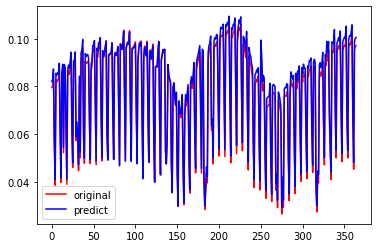

In [109]:
plt.figure() 
plt.plot(np.array(y_test['승차유임승객수']), c='r', label='original') 
plt.plot(pred[:,0], c='b', label='predict') 
plt.legend()
plt.savefig('모델51.png')
plt.show()

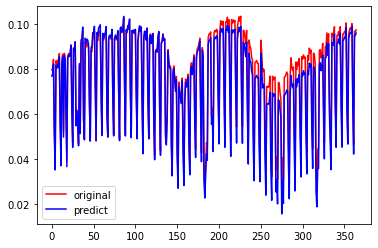

In [110]:
plt.figure() 
plt.plot(np.array(y_test['하차유임승객수']), c='r', label='original') 
plt.plot(pred[:,1], c='b', label='predict') 
plt.legend()
plt.savefig('모델52.png')
plt.show()

# 모델6

In [111]:
X_train = train_data.drop(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '승차유임승객수', '하차유임승객수', '엘리베이터', '에스컬레이터', '휠체어리프트', '이동식 안전발판', '전동휠체어급속충전기', '장애인 화장실', '물품보관함', '유아수유실'], axis=1)
y_train = train_data[['승차유임승객수', '하차유임승객수']]

X_test = test_data.drop(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '승차유임승객수', '하차유임승객수', '엘리베이터', '에스컬레이터', '휠체어리프트', '이동식 안전발판', '전동휠체어급속충전기', '장애인 화장실', '물품보관함', '유아수유실'], axis=1)
y_test = test_data[['승차유임승객수', '하차유임승객수']]

In [112]:
X = tf.keras.layers.Input(shape=[7]) #피쳐의 개수 넣어줌
H = tf.keras.layers.Dense(64, activation='swish')(X)
H1 = tf.keras.layers.Dense(32, activation='swish')(H)
H2 = tf.keras.layers.Dense(16, activation='swish')(H1)
H3 = tf.keras.layers.Dense(8, activation='swish')(H2)
y = tf.keras.layers.Dense(2)(H3)
model = tf.keras.models.Model(X,y)
model.compile(loss='mse')

In [113]:
model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
23/23 [==============================] - 0s 545us/step - loss: 0.0020
Epoch 2/1000
23/23 [==============================] - 0s 500us/step - loss: 7.2416e-04
Epoch 3/1000
23/23 [==============================] - 0s 500us/step - loss: 7.5077e-04
Epoch 4/1000
23/23 [==============================] - 0s 500us/step - loss: 7.1752e-04
Epoch 5/1000
23/23 [==============================] - 0s 455us/step - loss: 7.2941e-04
Epoch 6/1000
23/23 [==============================] - 0s 500us/step - loss: 7.3156e-04
Epoch 7/1000
23/23 [==============================] - 0s 500us/step - loss: 7.1179e-04
Epoch 8/1000
23/23 [==============================] - 0s 546us/step - loss: 7.2238e-04
Epoch 9/1000
23/23 [==============================] - 0s 500us/step - loss: 7.0653e-04
Epoch 10/1000
23/23 [==============================] - 0s 500us/step - loss: 6.9894e-04
Epoch 11/1000
23/23 [==============================] - 0s 546us/step - loss: 7.2865e-04
Epoch 12/1000
23/23 [========================

23/23 [==============================] - 0s 546us/step - loss: 4.8820e-04
Epoch 187/1000
23/23 [==============================] - 0s 546us/step - loss: 4.7333e-04
Epoch 188/1000
23/23 [==============================] - 0s 546us/step - loss: 4.6948e-04
Epoch 189/1000
23/23 [==============================] - 0s 546us/step - loss: 4.8417e-04
Epoch 190/1000
23/23 [==============================] - 0s 546us/step - loss: 4.9426e-04
Epoch 191/1000
23/23 [==============================] - 0s 546us/step - loss: 4.6766e-04
Epoch 192/1000
23/23 [==============================] - 0s 546us/step - loss: 4.9517e-04
Epoch 193/1000
23/23 [==============================] - 0s 546us/step - loss: 4.7358e-04
Epoch 194/1000
23/23 [==============================] - 0s 546us/step - loss: 4.8248e-04
Epoch 195/1000
23/23 [==============================] - 0s 546us/step - loss: 4.6378e-04
Epoch 196/1000
23/23 [==============================] - 0s 500us/step - loss: 4.7578e-04
Epoch 197/1000
23/23 [==============

23/23 [==============================] - 0s 546us/step - loss: 4.1052e-04
Epoch 371/1000
23/23 [==============================] - 0s 500us/step - loss: 4.0154e-04
Epoch 372/1000
23/23 [==============================] - 0s 455us/step - loss: 4.0241e-04
Epoch 373/1000
23/23 [==============================] - 0s 546us/step - loss: 3.9683e-04
Epoch 374/1000
23/23 [==============================] - 0s 500us/step - loss: 4.2573e-04
Epoch 375/1000
23/23 [==============================] - 0s 455us/step - loss: 3.9009e-04
Epoch 376/1000
23/23 [==============================] - 0s 500us/step - loss: 4.0837e-04
Epoch 377/1000
23/23 [==============================] - 0s 500us/step - loss: 4.0069e-04
Epoch 378/1000
23/23 [==============================] - 0s 500us/step - loss: 4.1975e-04
Epoch 379/1000
23/23 [==============================] - 0s 500us/step - loss: 4.0340e-04
Epoch 380/1000
23/23 [==============================] - 0s 455us/step - loss: 4.0132e-04
Epoch 381/1000
23/23 [==============

23/23 [==============================] - 0s 500us/step - loss: 3.4359e-04
Epoch 555/1000
23/23 [==============================] - 0s 500us/step - loss: 3.0595e-04
Epoch 556/1000
23/23 [==============================] - 0s 500us/step - loss: 3.5096e-04
Epoch 557/1000
23/23 [==============================] - 0s 500us/step - loss: 3.4251e-04
Epoch 558/1000
23/23 [==============================] - 0s 500us/step - loss: 3.4081e-04
Epoch 559/1000
23/23 [==============================] - 0s 500us/step - loss: 3.1488e-04
Epoch 560/1000
23/23 [==============================] - 0s 455us/step - loss: 3.2135e-04
Epoch 561/1000
23/23 [==============================] - 0s 455us/step - loss: 3.3408e-04
Epoch 562/1000
23/23 [==============================] - 0s 500us/step - loss: 3.4128e-04
Epoch 563/1000
23/23 [==============================] - 0s 455us/step - loss: 3.1689e-04
Epoch 564/1000
23/23 [==============================] - 0s 455us/step - loss: 3.2185e-04
Epoch 565/1000
23/23 [==============

23/23 [==============================] - 0s 455us/step - loss: 2.6484e-04
Epoch 738/1000
23/23 [==============================] - 0s 500us/step - loss: 2.7515e-04
Epoch 739/1000
23/23 [==============================] - 0s 500us/step - loss: 2.6749e-04
Epoch 740/1000
23/23 [==============================] - 0s 455us/step - loss: 2.9484e-04
Epoch 741/1000
23/23 [==============================] - 0s 455us/step - loss: 2.6747e-04
Epoch 742/1000
23/23 [==============================] - 0s 455us/step - loss: 2.9325e-04
Epoch 743/1000
23/23 [==============================] - 0s 546us/step - loss: 2.5499e-04
Epoch 744/1000
23/23 [==============================] - 0s 500us/step - loss: 2.7954e-04
Epoch 745/1000
23/23 [==============================] - 0s 455us/step - loss: 2.7246e-04
Epoch 746/1000
23/23 [==============================] - 0s 500us/step - loss: 2.6894e-04
Epoch 747/1000
23/23 [==============================] - 0s 500us/step - loss: 2.6039e-04
Epoch 748/1000
23/23 [==============

23/23 [==============================] - 0s 455us/step - loss: 2.2646e-04
Epoch 922/1000
23/23 [==============================] - 0s 455us/step - loss: 2.4305e-04
Epoch 923/1000
23/23 [==============================] - 0s 500us/step - loss: 2.3714e-04
Epoch 924/1000
23/23 [==============================] - 0s 500us/step - loss: 2.4718e-04
Epoch 925/1000
23/23 [==============================] - 0s 500us/step - loss: 2.3866e-04
Epoch 926/1000
23/23 [==============================] - 0s 500us/step - loss: 2.4202e-04
Epoch 927/1000
23/23 [==============================] - 0s 500us/step - loss: 2.5121e-04
Epoch 928/1000
23/23 [==============================] - 0s 500us/step - loss: 2.4420e-04
Epoch 929/1000
23/23 [==============================] - 0s 500us/step - loss: 2.3162e-04
Epoch 930/1000
23/23 [==============================] - 0s 500us/step - loss: 2.4276e-04
Epoch 931/1000
23/23 [==============================] - 0s 500us/step - loss: 2.3459e-04
Epoch 932/1000
23/23 [==============

In [114]:
pred = model.predict(X_test)

In [115]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, pred) 
np.sqrt(MSE)

0.025417946362392

In [116]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

0.022269628959242182

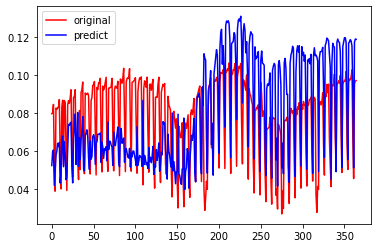

In [117]:
plt.figure() 
plt.plot(np.array(y_test['승차유임승객수']), c='r', label='original') 
plt.plot(pred[:,0], c='b', label='predict') 
plt.legend()
plt.savefig('모델61.png')
plt.show()

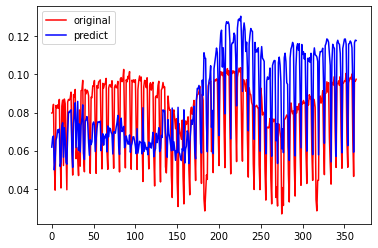

In [118]:
plt.figure() 
plt.plot(np.array(y_test['하차유임승객수']), c='r', label='original') 
plt.plot(pred[:,1], c='b', label='predict') 
plt.legend()
plt.savefig('모델62.png')
plt.show()